In [2]:
!pip install sklearn pandas matplotlib numpy

You should consider upgrading via the 'C:\Users\Victor\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import matplotlib
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("dataframe.csv")

In [5]:
without = len(df[df["any"] == 1])

In [6]:
data_df = pd.concat([df[df["any"] == 0 ].sample(n = without), df[df["any"] == 1]])

In [7]:
data_df['powerlabel'] = data_df.apply(lambda x : 32*x["epidural"]+16*x["intraparenchymal"]+8*x['intraventricular']+4*x['subarachnoid']+2*x['subdural'] + x["any"],axis=1)

In [8]:
data_df

,imagePath,imageName,epidural,intraparenchymal,intraventricular,subarachnoid,subdural,any,powerlabel
144302,final_train/data/ID_2b9e788ce.jpg,ID_2b9e788ce,0,0,0,0,0,0,0
494337,final_train/data/ID_ea296fa7e.jpg,ID_ea296fa7e,0,0,0,0,0,0,0
292975,final_train/data/ID_a6f2ec758.jpg,ID_a6f2ec758,0,0,0,0,0,0,0
132326,final_train/data/ID_481e8f966.jpg,ID_481e8f966,0,0,0,0,0,0,0
500902,final_train/data/ID_a6ed27220.jpg,ID_a6ed27220,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
752750,final_train/data/ID_012b4b6d8.jpg,ID_012b4b6d8,0,0,0,1,1,1,7
752756,final_train/data/ID_cade771b5.jpg,ID_cade771b5,0,1,0,1,0,1,21
752759,final_train/data/ID_af06b825e.jpg,ID_af06b825e,0,0,0,0,1,1,3
752774,final_train/data/ID_21ea5fffb.jpg,ID_21ea5fffb,0,1,0,1,0,1,21


<AxesSubplot:>

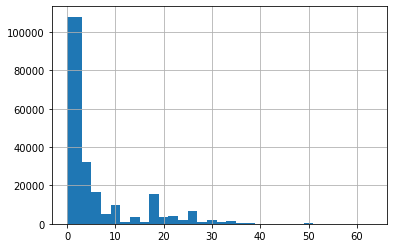

In [9]:
data_df["powerlabel"].hist(bins=np.unique(data_df['powerlabel']))

In [10]:
data_df.shape[0]

215866

In [11]:
train_inds, val_inds = train_test_split(np.array(list(range(data_df.shape[0]))),test_size=1/3,random_state=7)

In [12]:
train_df = data_df.iloc[train_inds,:].reset_index(drop=True)
val_df = data_df.iloc[val_inds,:].reset_index(drop=True)

In [13]:
print(len(train_df))
print(len(val_df))

143910
71956


<AxesSubplot:>

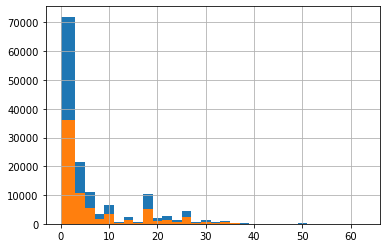

In [14]:
train_df["powerlabel"].hist(bins=np.unique(train_df['powerlabel']))
val_df["powerlabel"].hist(bins=np.unique(val_df['powerlabel']))

In [15]:
train_df.drop(columns=['powerlabel'], inplace= True)
val_df.drop(columns=['powerlabel'], inplace= True)

In [16]:
train_df.to_csv("final_csvs/final_train_df.csv", index = False)

In [17]:
val_df.to_csv("final_csvs/final_test_df.csv", index = False)

In [18]:
train_df[train_df["any"] == 1]

,imagePath,imageName,epidural,intraparenchymal,intraventricular,subarachnoid,subdural,any
0,final_train/data/ID_7cce4a847.jpg,ID_7cce4a847,0,0,0,0,1,1
6,final_train/data/ID_0825ae924.jpg,ID_0825ae924,0,0,1,1,0,1
8,final_train/data/ID_f643a1dd9.jpg,ID_f643a1dd9,0,1,0,0,1,1
9,final_train/data/ID_6f5be7cb9.jpg,ID_6f5be7cb9,0,1,0,0,0,1
10,final_train/data/ID_e4034dbea.jpg,ID_e4034dbea,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...
143894,final_train/data/ID_b98e1bbd2.jpg,ID_b98e1bbd2,0,1,0,0,0,1
143896,final_train/data/ID_175bda755.jpg,ID_175bda755,0,1,1,1,1,1
143900,final_train/data/ID_42d2cff57.jpg,ID_42d2cff57,0,1,0,0,0,1
143901,final_train/data/ID_34a704370.jpg,ID_34a704370,1,0,0,0,0,1


In [19]:
val_df[val_df["any"] == 1]

,imagePath,imageName,epidural,intraparenchymal,intraventricular,subarachnoid,subdural,any
0,final_train/data/ID_38c555d41.jpg,ID_38c555d41,0,0,1,1,0,1
1,final_train/data/ID_0420e38ba.jpg,ID_0420e38ba,0,0,1,1,1,1
2,final_train/data/ID_bfa79ada1.jpg,ID_bfa79ada1,0,0,0,0,1,1
3,final_train/data/ID_9e0a13a65.jpg,ID_9e0a13a65,0,1,0,1,1,1
6,final_train/data/ID_dc90155b4.jpg,ID_dc90155b4,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...
71947,final_train/data/ID_033c6a5b1.jpg,ID_033c6a5b1,0,0,0,1,0,1
71949,final_train/data/ID_478c936e0.jpg,ID_478c936e0,0,1,0,0,0,1
71950,final_train/data/ID_a7e6d1205.jpg,ID_a7e6d1205,0,1,0,0,1,1
71952,final_train/data/ID_79dcbc645.jpg,ID_79dcbc645,0,0,0,0,1,1


In [20]:
len(val_df[val_df["any"] == 1]) / (len(train_df[train_df["any"] == 1]) + len(val_df[val_df["any"] == 1]))

0.3337904070117573

In [21]:
len(train_df[train_df["epidural"] == 1]) + len(val_df[val_df["epidural"] == 1])

3145

In [22]:
len(train_df[train_df["intraparenchymal"] == 1]) + len(val_df[val_df["intraparenchymal"] == 1])

36118

In [25]:
len(train_df[train_df["subarachnoid"] == 1]) / (len(train_df[train_df["any"] == 1]) 

0.16553401431450213

In [51]:
len(val_df[val_df["subarachnoid"] == 1]) / (len(val_df[val_df["any"] == 1]) + len(val_df[val_df["any"] == 0]))

0.16472566568458502

In [44]:
len(val_df[val_df["subarachnoid"] == 1]) / (len(val_df[val_df["any"] == 1]) + (len(val_df[val_df["any"] == 0]))

SyntaxError: unexpected EOF while parsing (<ipython-input-44-df4252055bbf>, line 1)